# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import layers
from keras import models


## Данные

**Загружаем данные**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

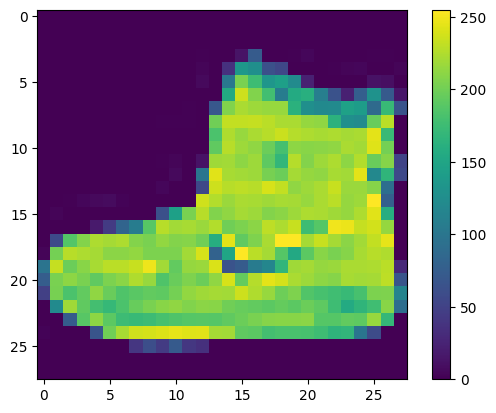

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Предобработка

**Нормализуйте данные X_train и X_test **

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0


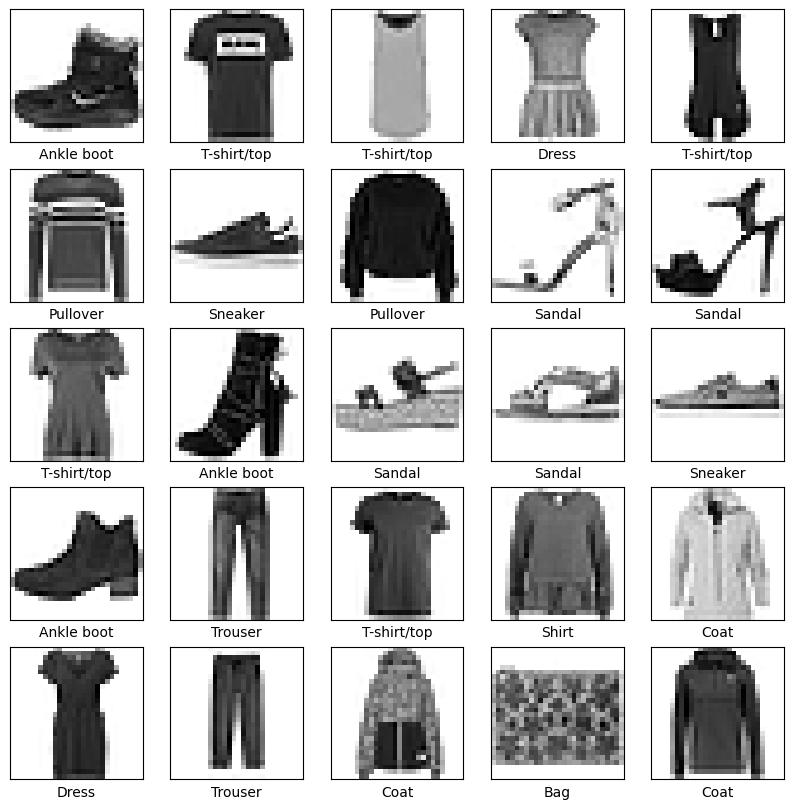

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [8]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print( x_train.shape )
print( x_test.shape )

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Преобразуйте  y_train и y_test в one_hot представления **

In [9]:
y_train_1 = keras.utils.to_categorical(y_train, 10)
y_test_1 = keras.utils.to_categorical(y_test, 10)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [10]:
model = keras.Sequential([
    Conv2D(32, (4,4), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804778 (3.07 MB)
Trainable params: 804778 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [27]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train_1, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0619 - accuracy: 0.9782 - val_loss: 0.3945 - val_accuracy: 0.9133
Epoch 2/50
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0537 - accuracy: 0.9813 - val_loss: 0.4114 - val_accuracy: 0.9113
Epoch 3/50
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0500 - accuracy: 0.9828 - val_loss: 0.4443 - val_accuracy: 0.9143
Epoch 4/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.4723 - val_accuracy: 0.9049
Epoch 5/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0410 - accuracy: 0.9860 - val_loss: 0.4711 - val_accuracy: 0.9055
Epoch 6/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.5017 - val_accuracy: 0.9118
Epoch 7/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.4899 -

Train: %.3f, Test: %.3f ([1.1186516284942627, 0.9180999994277954], [1.1186516284942627, 0.9180999994277954])




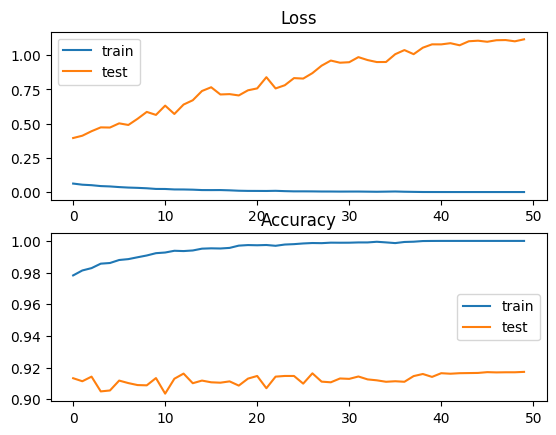

In [28]:
train_acc = model.evaluate(x_test, y_test_1, verbose=0)
test_acc = model.evaluate(x_test, y_test_1, verbose=0)
print('Train: %.3f, Test: %.3f', (train_acc, test_acc))
print('\n')
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print(predictions.shape)


313/313 [==============================] - 2s 5ms/step
(10000, 10)


In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test_1, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.1187 - accuracy: 0.9181 - 2s/epoch - 7ms/step

Test accuracy: 0.9180999994277954


In [32]:
print("Test precision=", average_precision_score(y_test_1, predictions))

y_test_2 = y_test_1[:, 1]
predictions1 = predictions[:, 1]
print(y_test_2.shape)

Test precision= 0.9379749559802313
(10000,)


In [34]:
predictions[0]
np.argmax(predictions[0])
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_1)):
    test.append(np.argmax(y_test_1[i]))
from sklearn.metrics import classification_report
print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.87      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.87      0.88      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.78      0.78      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Дополнительно

* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели